# FOV evaluation for MEMS device using High precision FOV device.
<div style="text-align: right;">6th September 2022<div>
<div style="text-align: right;">15th Nobember 2022<div>
<div style="text-align: right;">Shinichiro Sonoda<div>

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob

In [2]:
img_array_slow = []
Sample_name ="SB2110108"
path = "../data/"+Sample_name+"/Ucam/img_"
angle_fast = 61.1
angle_slow = 41.4
conditions = (0.4,0.6,0.4,0.6)

for i in [3,4]:
    files_slow = glob.glob(path + str(i) + '_*.png')
    img_array_slow.append([cv2 . imread (file , 0 ) for file in files_slow])
    
img_array_fast = []
for i in [1,2]:
    files_fast = glob.glob(path + str(i) + '_*.png')
    img_array_fast.append([cv2 . imread (file , 0 ) for file in files_fast])

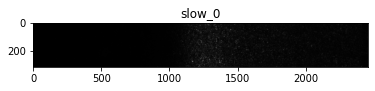

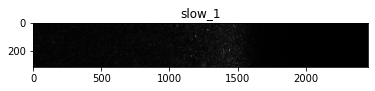

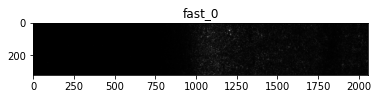

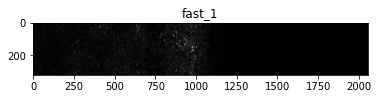

In [3]:
for i in range(2):
    img_slow = img_array_slow[i][0]
    plt.gray()
    plt.title("slow_"+str(i))
    plt.imshow(img_slow)
    plt.show()
    
for i in range(2):
    img_fast = img_array_fast[i][0]
    plt.gray()
    plt.title("fast_"+str(i))
    plt.imshow(img_fast)
    plt.show()

In [4]:
def draw_img_array(img_array, title):
    for img in img_array:
        x = np.array(range(img.shape[1]))
        y = np.average(img, axis = 0)
        plt.plot(x, y)

    plt.xlabel("Position (px)")
    plt.ylabel("Amplitude (/8bit)")
    plt.title(title)
    
    path = "../High_precision_data/" + title +".png"
    print(path)
    plt.savefig(path)
    
    plt.show()

In [5]:
def draw_img_array_zoom(img_array, title, x_range):
    for img in img_array:
        x = np.array(range(img.shape[1]))
        y = np.average(img, axis = 0)
        plt.plot(x, y)
       
    plt.xlabel("Position (px)")
    plt.ylabel("Amplitude (/8bit)")
    plt.title(title)
    plt.xlim(x_range[0], x_range[1]) 
    plt.show()

In [6]:
def detect_edge(img_array, y_range, print_flag=False):

    edge0 = []

    for img in img_array[0]:
        x = np.array(range(img.shape[1]))
        y = np.average(img, axis = 0)
        y = y/np.max(y)
        if print_flag:
            print("L", np.where((y > y_range[0]) & (y < y_range[1]))[0][0])
        edge0.append(np.where((y > y_range[0]) & (y < y_range[1]))[0][0])
        
    edge1 = []

    for img in img_array[1]:
        x = np.array(range(img.shape[1]))
        y = np.average(img, axis = 0)
        y = y/np.max(y)
        if print_flag:
            print("R", np.where((y > y_range[2]) & (y < y_range[3]))[0][-1])
        edge1.append(np.where((y > y_range[2]) & (y <y_range[3]))[0][-1])
        
    y_dist = np.array(edge1) - np.array(edge0)
    y_dist_norm = y_dist - np.average(y_dist)
    
    return y_dist, np.array(edge0), np.array(edge1)

../High_precision_data/SB2110108 Camera 3.png


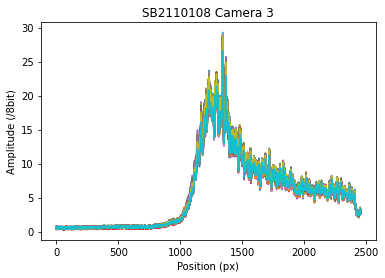

In [7]:
 draw_img_array(img_array_slow[0], title = Sample_name + " Camera 3")

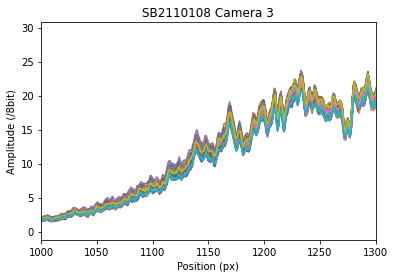

In [8]:
 draw_img_array_zoom(img_array_slow[0],  Sample_name + " Camera 3", (1000,1300))

../High_precision_data/SB2110108 Camera 4.png


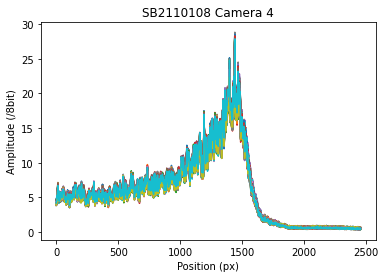

In [9]:
 draw_img_array(img_array_slow[1], title = Sample_name + " Camera 4")

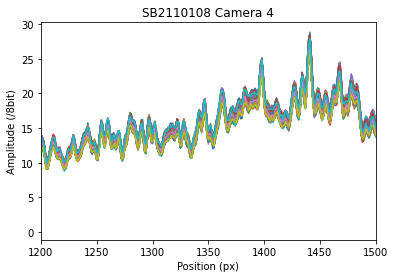

In [10]:
 draw_img_array_zoom(img_array_slow[1],  Sample_name + " Camera 4", (1200,1500))

array([409, 407, 409, 408, 408, 409, 410, 408, 409, 408, 407, 409, 409,
       408, 409, 408, 408, 407, 408, 407, 411, 408, 408, 403, 409, 410,
       409, 408, 408, 411, 410, 411, 411, 410, 407, 410, 409, 409, 410,
       411, 410, 409, 411, 411, 413, 408, 410, 410, 412, 412, 412, 412,
       410, 413, 409, 409, 408, 412, 410, 409, 409, 411, 411, 410, 413,
       411, 412, 407, 410, 411, 411, 412, 410, 408, 409, 409, 409, 409,
       408, 402, 409, 410, 409, 409, 408, 409, 408, 408, 408, 408, 408,
       409, 408, 408, 409, 409, 410, 408, 408, 408], dtype=int64)

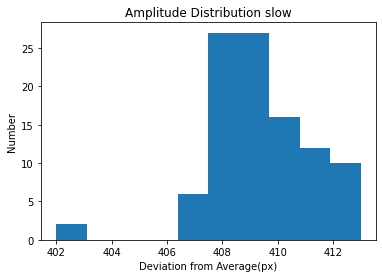

In [11]:
def hist_y_dist(img_array, text):
    y_dist, _, _= detect_edge(img_array, conditions)
    plt.xlabel("Deviation from Average(px)")
    plt.ylabel("Number")
    plt.title("Amplitude Distribution" + text)
    plt.hist(y_dist)
    return y_dist

hist_y_dist(img_array_slow, " slow")

In [12]:
def delta_angle(angle, L=400 ,px=8.473/2456):
    x = L * np.tan(np.deg2rad(angle/2))
    angle_plus  = np.rad2deg(np.arctan((x + px)/L))
    angle_minus = np.rad2deg(np.arctan((x - px)/L))
    return (angle_plus, angle_minus)

def deviation(angle_dush, angle):
    plus = (angle_dush[0] - angle/2)/(angle)
    minus = (angle_dush[1] - angle/2)/(angle)
    return (plus - minus)/2

In [13]:
def set_rate_per_px(angle):
    rate_per_px = deviation(delta_angle(angle), angle)
    #print(rate_per_px)
    return rate_per_px

In [14]:
def draw_hist(angle, img_array, title, center= 189.4, range=[100,300] ,iter=0):
    rate_per_px = set_rate_per_px(angle)
    y_dist, _, _ = detect_edge(img_array,conditions)
    fig = plt.figure(facecolor="w")
    ax = fig.add_subplot(1, 1, 1)
    plt.xlabel("Deviation (px)")
    plt.ylabel("Number")
    plt.title(Sample_name + title + " iter=" + str(iter + 1))
    hist_data = plt.hist(y_dist, bins=60, range=range)
    #print(np.max(hist_data[0]))

    x_min , x_max = range[0], range[1]
    #plt.xlim(x_min, x_max)
    x = np.linspace(x_min, x_max, 101)
    y =  np.max(hist_data[0]) * np.exp(-((x-np.mean(y_dist))**2/(2*np.std(y_dist)**2)))
    ax.plot(x,y, c='r')
    ax.text(0.03, 0.98, r"$\sigma$ = {:.1f} px : {:.1e}".format(np.std(y_dist),np.std(y_dist) * rate_per_px),\
            verticalalignment='top', transform=ax.transAxes)
    ax.text(0.03, 0.90, r"$\mu$ = {:.1f} px : {:.4f} deg".format(np.average(y_dist),\
            angle - (np.average(y_dist)-center) * rate_per_px * angle),\
            verticalalignment='top', transform=ax.transAxes)
    
def draw_hist2(angle, img_array, title, center= 189.4, range=[100,300] ,iter=0):
    rate_per_px = set_rate_per_px(angle)
    y_dist, _, _ = detect_edge(img_array,conditions)
    fig = plt.figure(facecolor="w")
    ax = fig.add_subplot(1, 1, 1)
    plt.xlabel("Deviation (px)")
    plt.ylabel("Number")
    plt.title(Sample_name + title)
    hist_data = plt.hist(y_dist, bins=60, range=[range[0]-400, range[1]+400])

    x_min , x_max = range[0]+np.mean(y_dist), range[1]+np.mean(y_dist)
    plt.xlim(x_min, x_max)
    x = np.linspace(x_min-100, x_max+100, 101)
    y =  np.max(hist_data[0]) * np.exp(-((x-np.mean(y_dist))**2/(2*np.std(y_dist)**2)))
    
    ax.plot(x,y, c='r')
    ax.text(0.03, 0.98, r"$\sigma$ = {:.1f} px : {:.1e}".format(np.std(y_dist),np.std(y_dist) * rate_per_px),\
            verticalalignment='top', transform=ax.transAxes)
    ax.text(0.03, 0.90, r"$\mu$ = {:.1f} px : {:.4f} deg".format(np.average(y_dist),\
            angle),\
            verticalalignment='top', transform=ax.transAxes)
    
    title = Sample_name + title
    path = "../High_precision_data/" + title +".png"
    print(path)
    plt.savefig(path)

../High_precision_data/SB2110108 Slow axis.png


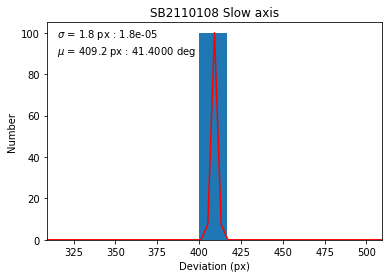

In [15]:
#draw_hist(angle_slow, img_array_slow, " Slow axis", center= 150.0, range=[50,250])
draw_hist2(angle_slow, img_array_slow, " Slow axis", center= 150.0, range=[-100,100])

../High_precision_data/SB2110108 Camera 1.png


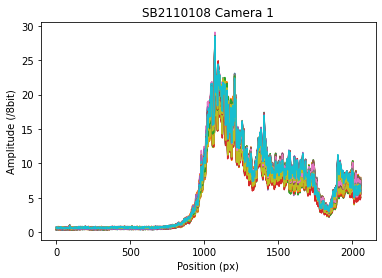

In [16]:
 draw_img_array(img_array_fast[0], title = Sample_name + " Camera 1")

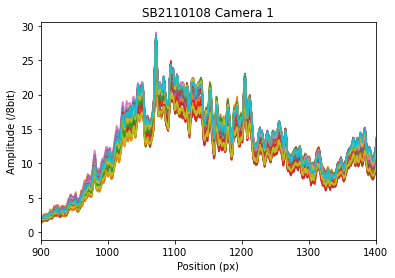

In [17]:
draw_img_array_zoom(img_array_fast[0],  Sample_name + " Camera 1", (900,1400))

../High_precision_data/SB2110108 Camera 2.png


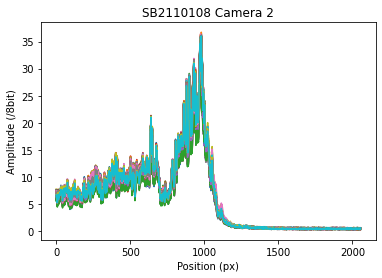

In [18]:
 draw_img_array(img_array_fast[1],  title = Sample_name + " Camera 2")

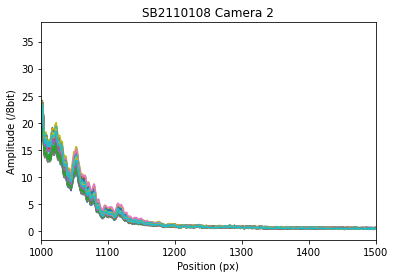

In [19]:
draw_img_array_zoom(img_array_fast[1], Sample_name + " Camera 2", (1000,1500))

array([22, 22, 23, 24, 23, 23, 23, 23, 29, 34, 34, 23, 23, 34, 22, 23, 52,
       22, 22, 23, 23, 52, 30, 22, 23, 23, 44, 23, 23, 23, 23, 22, 21, 23,
       21, 22, 34, 22, 21, 23, 22, 23, 34, 23, 22, 44, 23, 23, 30, 23, 22,
       22, 34, 23, 23, 44, 23, 22, 22, 23, 21, 22, 22, 34, 23, 22, 23, 22,
       21, 23, 43, 23, 23, 23, 22, 22, 21, 21, 46, 22, 22, 23, 23, 34, 52,
       23, 45, 23, 23, 29, 23, 23, 22, 20, 22, 23, 23, 23, 22, 23],
      dtype=int64)

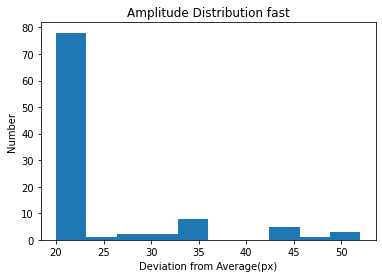

In [20]:
hist_y_dist(img_array_fast, " fast")

../High_precision_data/SB2110108 fast axis.png


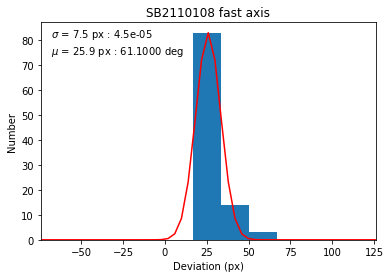

In [21]:
draw_hist2(angle_fast, img_array_fast, " fast axis",   center= 216.0, range=[-100,100] )